## K-Meansによる分類結果の検証（7/14分の課題）

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('iris_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df['Name'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Name, dtype: int64

In [4]:
data = df[['SepalLength', 'PetalLength']]

In [27]:
clf = KMeans(n_clusters=3, random_state=0)
clf.fit(data)
res = clf.labels_
print(res)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [6]:
df['Name']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Name, Length: 150, dtype: object

In [7]:
df_copy = df.copy()

In [28]:
df_copy['Name'] = df['Name'].map({'setosa':0, 'versicolor':2, 'virginica':1})

In [29]:
res_series = pd.Series(res)

In [30]:
res_series

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    2
147    1
148    1
149    2
Length: 150, dtype: int32

In [11]:
df_copy['Name']

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Name, Length: 150, dtype: int64

In [31]:
df_copy['clustered_name'] = res_series

In [32]:
df_failed = df_copy[df_copy['Name'] != res_series][['SepalLength', 'PetalLength']]

In [33]:
df_success = df_copy[df_copy['Name'] == res_series][['SepalLength', 'PetalLength']]

In [34]:
len(df_failed)

18

In [35]:
len(df_success)

132

/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key

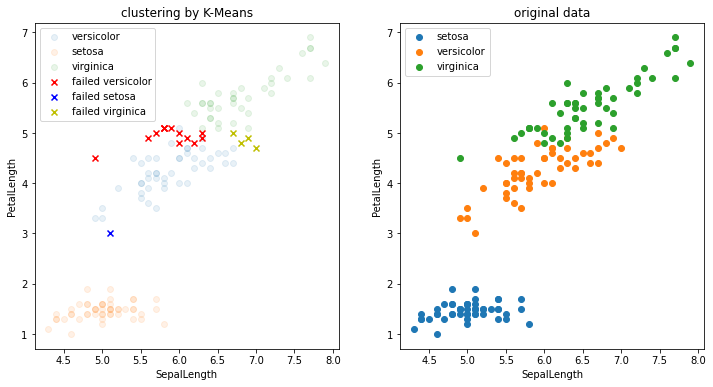

In [36]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('clustering by K-Means')
plt.scatter(x=df_success[df_copy['Name'] == 2]['SepalLength'], y=df_success[df_copy['Name'] == 2]['PetalLength'], marker='o', alpha=0.1, label='versicolor')
plt.scatter(x=df_success[df_copy['Name'] == 0]['SepalLength'], y=df_success[df_copy['Name'] == 0]['PetalLength'], marker='o', alpha=0.1, label='setosa')
plt.scatter(x=df_success[df_copy['Name'] == 1]['SepalLength'], y=df_success[df_copy['Name'] == 1]['PetalLength'], marker='o', alpha=0.1, label='virginica')
plt.scatter(x=df_failed[df_copy['clustered_name'] == 2]['SepalLength'], y=df_failed[df_copy['clustered_name'] == 2]['PetalLength'], marker='x', color='r', label='failed versicolor')
plt.scatter(x=df_failed[df_copy['clustered_name'] == 0]['SepalLength'], y=df_failed[df_copy['clustered_name'] == 0]['PetalLength'], marker='x', color='b', label='failed setosa')
plt.scatter(x=df_failed[df_copy['clustered_name'] == 1]['SepalLength'], y=df_failed[df_copy['clustered_name'] == 1]['PetalLength'], marker='x', color='y', label='failed virginica')
plt.legend()
plt.xlabel('SepalLength', fontsize=10)
plt.ylabel('PetalLength', fontsize=10)

plt.subplot(1,2,2)
plt.title('original data')
plt.scatter(x=df[df['Name']=='setosa']['SepalLength'], y=df[df['Name']=='setosa']['PetalLength'], label='setosa')
plt.scatter(x=df[df['Name']=='versicolor']['SepalLength'], y=df[df['Name']=='versicolor']['PetalLength'], label='versicolor')
plt.scatter(x=df[df['Name']=='virginica']['SepalLength'], y=df[df['Name']=='virginica']['PetalLength'], label='virginica')
plt.legend()
plt.xlabel('SepalLength', fontsize=10)
plt.ylabel('PetalLength', fontsize=10)
plt.show()

SVMで分類したときのイメージが残っているので、setosaがなぜ正しく分類できないのかが気になった。

→K-Means法の原理を浅く調査。クラスタ分類に重心というものを計算しているのがわかったので、それを可視化してみる。

クラスタの重心を取得

In [38]:
centers = clf.cluster_centers_
centers

array([[5.00784314, 1.49411765],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/var/pyenv/versions/3.7.6/lib/p

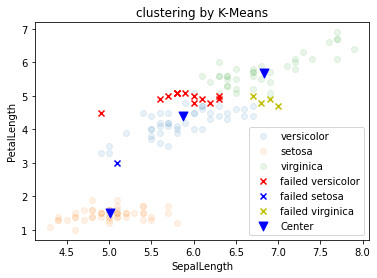

In [44]:
plt.title('clustering by K-Means')
plt.scatter(x=df_success[df_copy['Name'] == 2]['SepalLength'], y=df_success[df_copy['Name'] == 2]['PetalLength'], marker='o', alpha=0.1, label='versicolor')
plt.scatter(x=df_success[df_copy['Name'] == 0]['SepalLength'], y=df_success[df_copy['Name'] == 0]['PetalLength'], marker='o', alpha=0.1, label='setosa')
plt.scatter(x=df_success[df_copy['Name'] == 1]['SepalLength'], y=df_success[df_copy['Name'] == 1]['PetalLength'], marker='o', alpha=0.1, label='virginica')
plt.scatter(x=df_failed[df_copy['clustered_name'] == 2]['SepalLength'], y=df_failed[df_copy['clustered_name'] == 2]['PetalLength'], marker='x', color='r', label='failed versicolor')
plt.scatter(x=df_failed[df_copy['clustered_name'] == 0]['SepalLength'], y=df_failed[df_copy['clustered_name'] == 0]['PetalLength'], marker='x', color='b', label='failed setosa')
plt.scatter(x=df_failed[df_copy['clustered_name'] == 1]['SepalLength'], y=df_failed[df_copy['clustered_name'] == 1]['PetalLength'], marker='x', color='y', label='failed virginica')
plt.scatter(x=centers[:,0], y=centers[:,1], marker='v', s=80, color='b', label='Center')

plt.legend()
plt.xlabel('SepalLength', fontsize=10)
plt.ylabel('PetalLength', fontsize=10)
plt.show()

sklearnでは重心の計算と、データ間の距離の計算に使う距離関数として、ユークリッド距離を使う。

縦軸・横軸のスケールを合わせてみる

/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/var/pyenv/versions/3

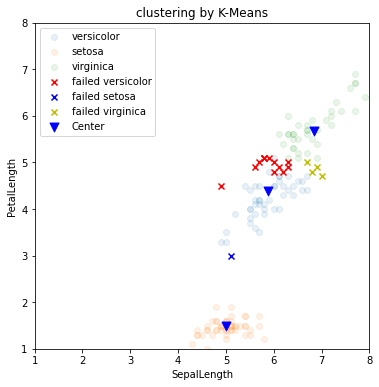

In [48]:
plt.figure(figsize=(6,6))
plt.title('clustering by K-Means')
plt.scatter(x=df_success[df_copy['Name'] == 2]['SepalLength'], y=df_success[df_copy['Name'] == 2]['PetalLength'], marker='o', alpha=0.1, label='versicolor')
plt.scatter(x=df_success[df_copy['Name'] == 0]['SepalLength'], y=df_success[df_copy['Name'] == 0]['PetalLength'], marker='o', alpha=0.1, label='setosa')
plt.scatter(x=df_success[df_copy['Name'] == 1]['SepalLength'], y=df_success[df_copy['Name'] == 1]['PetalLength'], marker='o', alpha=0.1, label='virginica')
plt.scatter(x=df_failed[df_copy['clustered_name'] == 2]['SepalLength'], y=df_failed[df_copy['clustered_name'] == 2]['PetalLength'], marker='x', color='r', label='failed versicolor')
plt.scatter(x=df_failed[df_copy['clustered_name'] == 0]['SepalLength'], y=df_failed[df_copy['clustered_name'] == 0]['PetalLength'], marker='x', color='b', label='failed setosa')
plt.scatter(x=df_failed[df_copy['clustered_name'] == 1]['SepalLength'], y=df_failed[df_copy['clustered_name'] == 1]['PetalLength'], marker='x', color='y', label='failed virginica')
plt.scatter(x=centers[:,0], y=centers[:,1], marker='v', s=80, color='b', label='Center')

plt.legend()
plt.xlabel('SepalLength', fontsize=10)
plt.ylabel('PetalLength', fontsize=10)
plt.xlim((1,8))
plt.ylim((1,8))
plt.show()

確かに重心に近い方に分類されていることが確認できた。

### ユークリッド距離以外を用いた分類

ユークリッド距離以外にも様々な関数（距離関数）が存在するらしい。

ベクトルの大きさを考慮せず、角度により距離を測るコサイン類似度と言われるものを使って分類してみた。

sklearnのKMeansにはオプションが用意されていないが、予めベクトルの正規化を行ってからユークリッド距離を計算することで擬似的にコサイン類似度を求められることがわかった。

https://qiita.com/obake_kaiware/items/36104a479582063308f0

In [51]:
from sklearn.preprocessing import normalize  #正規化関数

In [54]:
data_norm = data.copy()
data_norm = normalize(data_norm, norm='l2')
data_norm

array([[0.96432615, 0.26471698],
       [0.96152395, 0.27472113],
       [0.96381112, 0.26658605],
       [0.95072984, 0.3100206 ],
       [0.96296402, 0.26962993],
       [0.95384925, 0.30028588],
       [0.95667388, 0.29116162],
       [0.95782629, 0.28734789],
       [0.95292578, 0.30320366],
       [0.95619996, 0.29271427],
       [0.96351791, 0.26764386],
       [0.9486833 , 0.31622777],
       [0.96      , 0.28      ],
       [0.9688027 , 0.24783325],
       [0.97926042, 0.2026056 ],
       [0.96707454, 0.2544933 ],
       [0.97222364, 0.23405384],
       [0.96432615, 0.26471698],
       [0.95828776, 0.28580512],
       [0.9593655 , 0.28216632],
       [0.95384925, 0.30028588],
       [0.9593655 , 0.28216632],
       [0.97717636, 0.21242964],
       [0.9486833 , 0.31622777],
       [0.92980661, 0.36804845],
       [0.95242415, 0.30477573],
       [0.95242415, 0.30477573],
       [0.96082359, 0.27716065],
       [0.96561576, 0.25997347],
       [0.94664991, 0.3222638 ],
       [0.

In [59]:
df_norm = pd.DataFrame(data_norm, columns=['SepalLength', 'PetalLength'])

In [60]:
clf2 = KMeans(n_clusters=3, random_state=0)
clf2.fit(df_norm)
pred2 = clf2.labels_

In [61]:
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [62]:
df_norm['Name'] = df['Name'].map({'setosa':0, 'versicolor':2, 'virginica':1})

In [65]:
df_norm['cluster_num'] = pred2

In [70]:
df_norm.head()

,SepalLength,PetalLength,Name,cluster_num
0,0.964326,0.264717,0,0
1,0.961524,0.274721,0,0
2,0.963811,0.266586,0,0
3,0.950730,0.310021,0,0
4,0.962964,0.269630,0,0


In [71]:
df_norm_success = df_norm[df_norm['Name'] == df_norm['cluster_num']]
df_norm_fail = df_norm[df_norm['Name'] != df_norm['cluster_num']]

/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean 

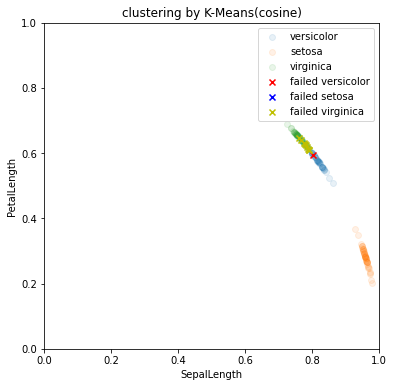

In [74]:
plt.figure(figsize=(6,6))

plt.title('clustering by K-Means(cosine)')
plt.scatter(x=df_norm_success[df_norm['Name'] == 2]['SepalLength'], y=df_norm_success[df_norm['Name'] == 2]['PetalLength'], marker='o', alpha=0.1, label='versicolor')
plt.scatter(x=df_norm_success[df_norm['Name'] == 0]['SepalLength'], y=df_norm_success[df_norm['Name'] == 0]['PetalLength'], marker='o', alpha=0.1, label='setosa')
plt.scatter(x=df_norm_success[df_norm['Name'] == 1]['SepalLength'], y=df_norm_success[df_norm['Name'] == 1]['PetalLength'], marker='o', alpha=0.1, label='virginica')
plt.scatter(x=df_norm_fail[df_norm['cluster_num'] == 2]['SepalLength'], y=df_norm_fail[df_norm['cluster_num'] == 2]['PetalLength'], marker='x', color='r', label='failed versicolor')
plt.scatter(x=df_norm_fail[df_norm['cluster_num'] == 0]['SepalLength'], y=df_norm_fail[df_norm['cluster_num'] == 0]['PetalLength'], marker='x', color='b', label='failed setosa')
plt.scatter(x=df_norm_fail[df_norm['cluster_num'] == 1]['SepalLength'], y=df_norm_fail[df_norm['cluster_num'] == 1]['PetalLength'], marker='x', color='y', label='failed virginica')
#plt.scatter(x=centers[:,0], y=centers[:,1], marker='v', s=80, color='b', label='Center')

plt.legend()
plt.xlabel('SepalLength', fontsize=10)
plt.ylabel('PetalLength', fontsize=10)
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()

正解率の比較

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
score1 = accuracy_score(df_copy['clustered_name'], df_copy['Name'])
score2 = accuracy_score(df_norm['cluster_num'], df_norm['Name'])

In [78]:
print(f"ユークリッド距離\t{score1*100:.3f}%")
print(f"コサイン類似度\t{score2*100:.3f}%")

ユークリッド距離	88.000%
コサイン類似度	93.333%


実行する前は、花弁と萼（がく）の長さを特徴量とし、単純にユークリッド距離を計算する方が精度が高いのではないかと何となく思っていたが、想像と違ってコサイン類似度で計算した方が精度が高かった。

irisの花をクラスタ分類する上では、花弁と萼の絶対的な大きさよりも、それらの比率の方がより有効な情報を持っていることがわかった。